In [ ]:
# import bibliotek

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, roc_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import danych

url = 'https://raw.githubusercontent.com/wizzy83/colab/master/dane%20csv.csv'
df = pd.read_csv(url, sep=';')

In [ ]:
# pozbycie sie nietkorych zmiennych oraz zamienienie przecinkow na kropki (aby python rozpoznawal liczby)

df = df.drop(['płeć', 'liceum komisja', 'liceum specjalność', 'studia specjalność', 'test zawodowy',
              'MBA specjalność', 'ID'], axis=1)
def f(a):
    df[str(a)] = df[str(a)].apply(lambda x: float(x.replace(',', '.')))

f('gimnazjum_ocena')
f('liceum ocena')
f('studia ocena')
f('MBA wyniki')

In [ ]:
# wyswietlenie informacji o zbiorze danych

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gimnazjum_ocena         215 non-null    float64
 1   gimnazjum_komisja       215 non-null    object 
 2   liceum ocena            215 non-null    float64
 3   studia ocena            215 non-null    float64
 4   doświadczenie zawodowe  215 non-null    object 
 5   MBA wyniki              215 non-null    float64
 6   oferta pracy            215 non-null    object 
 7   wynagrodzenie           148 non-null    float64
dtypes: float64(5), object(3)
memory usage: 13.6+ KB


,gimnazjum_ocena,liceum ocena,studia ocena,MBA wyniki,wynagrodzenie
count,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,62.278186,288655.405405
std,10.827205,10.897509,7.358743,5.833385,93457.452420
min,40.890000,37.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,77.890000,940000.000000


In [ ]:
# pierwsze 5 wierszy zbioru danych

df.head()

,gimnazjum_ocena,gimnazjum_komisja,liceum ocena,studia ocena,doświadczenie zawodowe,MBA wyniki,oferta pracy,wynagrodzenie
0,67.00,Others,91.00,58.00,No,58.80,Placed,270000.0
1,79.33,Central,78.33,77.48,Yes,66.28,Placed,200000.0
2,65.00,Central,68.00,64.00,No,57.80,Placed,250000.0
3,56.00,Central,52.00,52.00,No,59.43,Not Placed,NaN
4,85.80,Central,73.60,73.30,No,55.50,Placed,425000.0


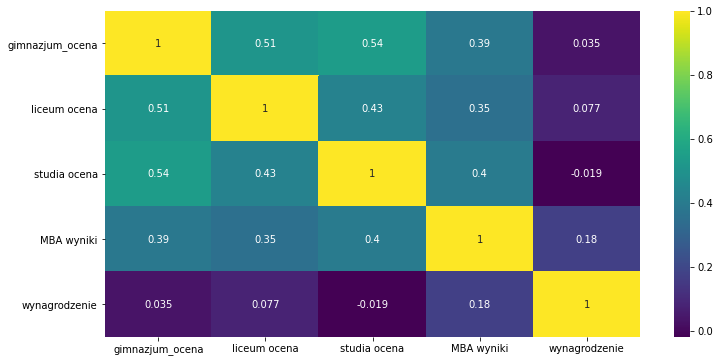

In [ ]:
# mapa korelacji zmiennych (tych ilosciowych)

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
# silna korelacja pomiedzy ocena na studiach i ocena w gimnazjum

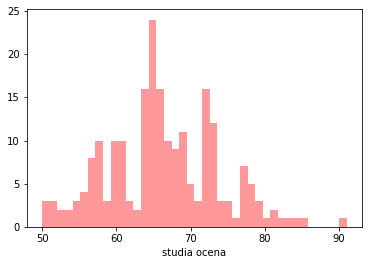

In [ ]:
sns.distplot(a=df['studia ocena'], kde=False, bins=40, color='red')

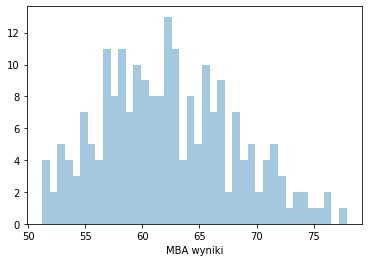

In [ ]:
sns.distplot(a=df['MBA wyniki'], kde=False, bins=40)
# rozklady zmiennych sa dosyc zblizone do siebie, cechuja sie asymetria prawostronna

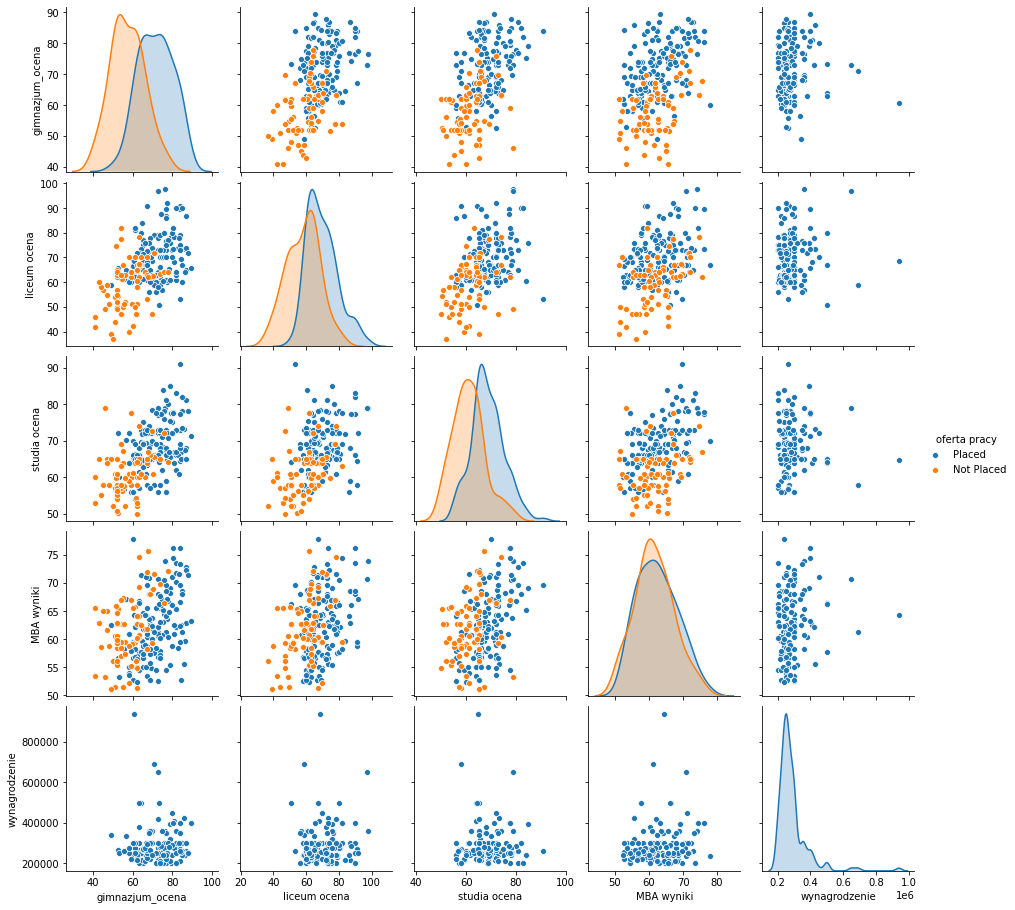

In [ ]:
sns.pairplot(data=df, hue='oferta pracy')
# zmienna objasniana jest dosyc widocznie sepraowalna przez ksztaltowanie sie zmiennych objasniajacych

In [ ]:
# przeksztalcanie zmiennych na dychotomiczne

df = df.replace(['Placed', 'Not Placed'], [1, 0])
df = df.replace(['Yes', 'No'], [1, 0])
df = df.replace(['Central', 'Others'], [1,0])

In [ ]:
# model

model = sm.Logit(endog=df['oferta pracy'], exog=sm.add_constant(df.drop(['wynagrodzenie', 'oferta pracy'], axis=1)))
results = model.fit()
print(results.summary())
# na poziomie istotnosci alpha = 0,05 zmienna gimnazjum_komisja jest nieistotna

Optimization terminated successfully.
         Current function value: 0.256404
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           oferta pracy   No. Observations:                  215
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 May 2020   Pseudo R-squ.:                  0.5867
Time:                        17:34:44   Log-Likelihood:                -55.127
converged:                       True   LL-Null:                       -133.39
Covariance Type:            nonrobust   LLR p-value:                 3.235e-31
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15.6176      4.066     -3.841      0.000     -23.587      

In [ ]:
# odrzucamy zmienne z gimnazjum

y = df['oferta pracy']
x = sm.add_constant(df.drop(['wynagrodzenie', 'oferta pracy', 'gimnazjum_ocena',
        'gimnazjum_komisja'], axis=1))

model2 = sm.Logit(endog=y, exog=x)
results = model2.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.358597
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           oferta pracy   No. Observations:                  215
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 May 2020   Pseudo R-squ.:                  0.4220
Time:                        17:34:44   Log-Likelihood:                -77.098
converged:                       True   LL-Null:                       -133.39
Covariance Type:            nonrobust   LLR p-value:                 2.056e-23
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12.1268      2.956     -4.102      0.000     -17.921      

In [ ]:
# zapisujemy teoretyczne wartosci zmiennej objasnianej (prawdopdobienstwa oraz te zaokraglone do 1 lub 0 przy granicy 0.5)

yhat_probabilties = model2.predict(results.params, exog=x)
yhat = (yhat_probabilties > 0.5).astype(int)

In [ ]:
# tablica wynikow (wiersze to wartosci empiryczne 0 i 1, kolumny to wartosci prognozowane 0 i 1) oraz podsumowanie trafnosci modelu

print(confusion_matrix(y, yhat), '\n', classification_report(y, yhat))

[[ 47  20]
 [ 12 136]] 
               precision    recall  f1-score   support

           0       0.80      0.70      0.75        67
           1       0.87      0.92      0.89       148

    accuracy                           0.85       215
   macro avg       0.83      0.81      0.82       215
weighted avg       0.85      0.85      0.85       215



In [ ]:
# zapisywanie wartosci AUC ROC (Area under ROC), oraz wartosci potrzebnych do stworzenia wykresy ROC

fpr, tpr, thresholds = roc_curve(y, yhat_probabilties)
AUC_score = roc_auc_score(y, yhat_probabilties)
print('AUROC wynosi:', AUC_score)

AUROC wynosi: 0.8953206938281565


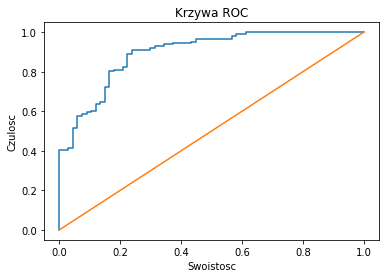

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.title("Krzywa ROC")
plt.xlabel("Recall")
plt.ylabel("Swoistość")
plt.show()